In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [2]:
x, y = datasets.load_iris(return_X_y=True)
df = pd.DataFrame(x)

In [3]:
pca = PCA(n_components=2)
x_transformed = pca.fit_transform(x)
x1 = x_transformed[:, 0]
x2 = x_transformed[:, 1]

In [4]:
class Kmeans():
  def __init__(self, clusters):
    self.clusters = clusters


  def centroids_initiation(self):
    centroids = np.random.rand(self.clusters, 2)
    return centroids
  
  def calculate_euclidian(self, centroids, data):
    distance = np.empty(shape=[150, 0])
    for centroid in centroids:
      distance = np.concatenate([distance, np.linalg.norm(data - centroid, axis=1).reshape([-1,1])], axis=1)
    return distance

  def fit(self, data, max_iter, tol):
    centroids = self.centroids_initiation()
    for i in range(max_iter):
      distance = self.calculate_euclidian(centroids, data)
      classes = np.argmin(distance, axis=1)

      for classification in classes:
        new_centroids = np.empty(shape = [3, 2])
        new_centroids[classification] = np.mean(data[classes == classification], axis=0)
      if np.linalg.norm(new_centroids - centroids) < tol:
        return centroids
      centroids = new_centroids


  def predict(self, data, centroids):
    distance = self.calculate_euclidian(centroids, data)
    classes = np.argmin(distance, axis=1)
    return classes

In [5]:
kmeans = Kmeans(3)
centroids = kmeans.fit(x_transformed, 100, 0.001)
classifications = kmeans.predict(x_transformed, centroids)
print(classifications)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


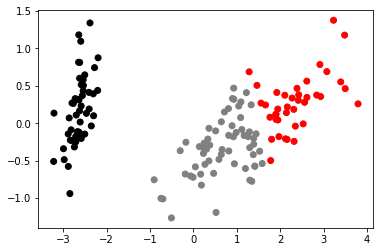

In [6]:
colors = ['red', 'k', 'grey']
classes_colored = [colors[x_transformed] for x_transformed in classifications]

plt.scatter(x1, x2, c=classes_colored)